# Building dashboards with streamlit

In [1]:
# Import Required Libraries

import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime as dt
from streamlit_keplergl import keplergl_static

### Wrangle data

In [3]:
!pip list

Package                   Version
------------------------- -----------
altair                    6.0.0
anyio                     4.7.0
appnope                   0.1.4
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
arrow                     1.4.0
asttokens                 3.0.0
async-lru                 2.0.4
attrs                     24.3.0
babel                     2.16.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blinker                   1.9.0
Bottleneck                1.4.2
Brotli                    1.0.9
cachetools                6.2.3
certifi                   2025.11.12
cffi                      1.17.1
charset-normalizer        2.0.4
click                     8.3.1
comm                      0.2.1
contourpy                 1.3.1
cryptography              44.0.1
cycler                    0.11.0
debugpy                   1.8.11
decorator                 5.1.1
defusedxml                0.7.1
deprecation               2.1.0
exceptiongroup    

In [2]:
# Load the chicago_data.csv file and set the first column as the index

df = pd.read_csv('chicago_data.csv', index_col = 0)

FileNotFoundError: [Errno 2] No such file or directory: 'chicago_data.csv'

In [3]:
# Display the data type of each column in the dataframe

df.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration         float64
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
date                  object
avgTemp              float64
_merge                object
birth_year             int64
birth_year_2          object
age                    int64
value                  int64
bike_rides_daily       int64
merge_flag            object
dtype: object

In [4]:
# Create a month column
# Convert date to datetime, extract month number, and store it as an integer

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['month'] = df['date'].dt.month
df['month'] = df['month'].astype('int')

In [5]:
# Create the season column
# Create a season column by assigning each month to a seasonal category

df['season'] = [
"winter" if (month == 12 or 1 <= month <= 4)
    else "spring" if (4 < month <= 5)
    else "summer" if (6 <= month <= 9)
    else "fall"
for month in df['month']]

In [6]:
# Display the number of rows and columns in the dataframe

df.shape

(3603082, 23)

In [7]:
# Display all column names in the dataframe

df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'date', 'avgTemp',
       '_merge', 'birth_year', 'birth_year_2', 'age', 'value',
       'bike_rides_daily', 'merge_flag', 'month', 'season'],
      dtype='object')

In [8]:
# Rename station columns for consistent naming

df.rename(columns = {'from_station_name':'start_station_name','to_station_name' : 'end_station_name'}, inplace = True)

In [9]:
# Display the updated column names after renaming

df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'start_station_name', 'to_station_id',
       'end_station_name', 'usertype', 'gender', 'birthyear', 'date',
       'avgTemp', '_merge', 'birth_year', 'birth_year_2', 'age', 'value',
       'bike_rides_daily', 'merge_flag', 'month', 'season'],
      dtype='object')

## Create the plotly charts

In [10]:
# Groupby
# Count total trips per start station and keep the top 20 stations by trip volume

df['value'] = 1 
df_groupby_bar = df.groupby('start_station_name', as_index=False).agg({'value': 'sum'})
top20 = df_groupby_bar.nlargest(20, 'value')

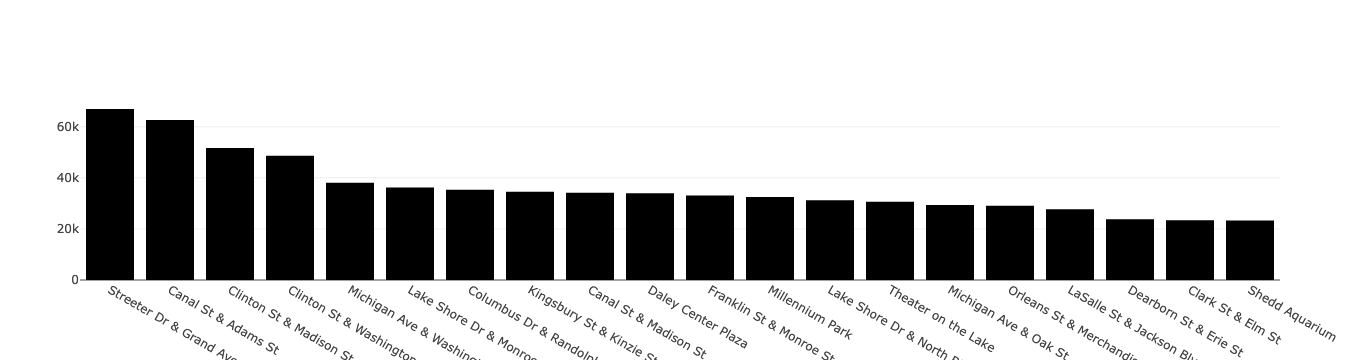

In [11]:
# Create and display a bar chart of the top 20 start stations using Plotly

fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value']))
fig.show()

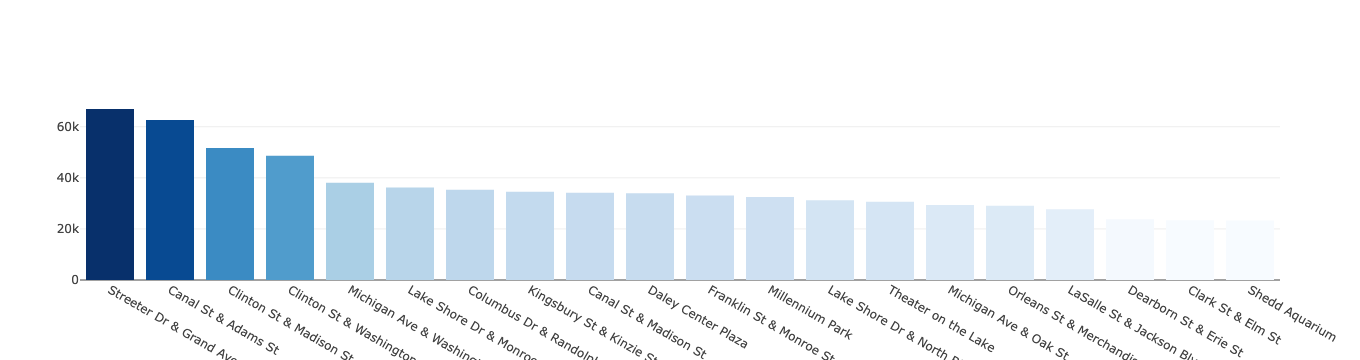

In [12]:
# Create and display a Plotly bar chart with bar colors scaled by trip counts

fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value'], marker={'color': top20['value'],'colorscale': 'Blues'}))
fig.show()

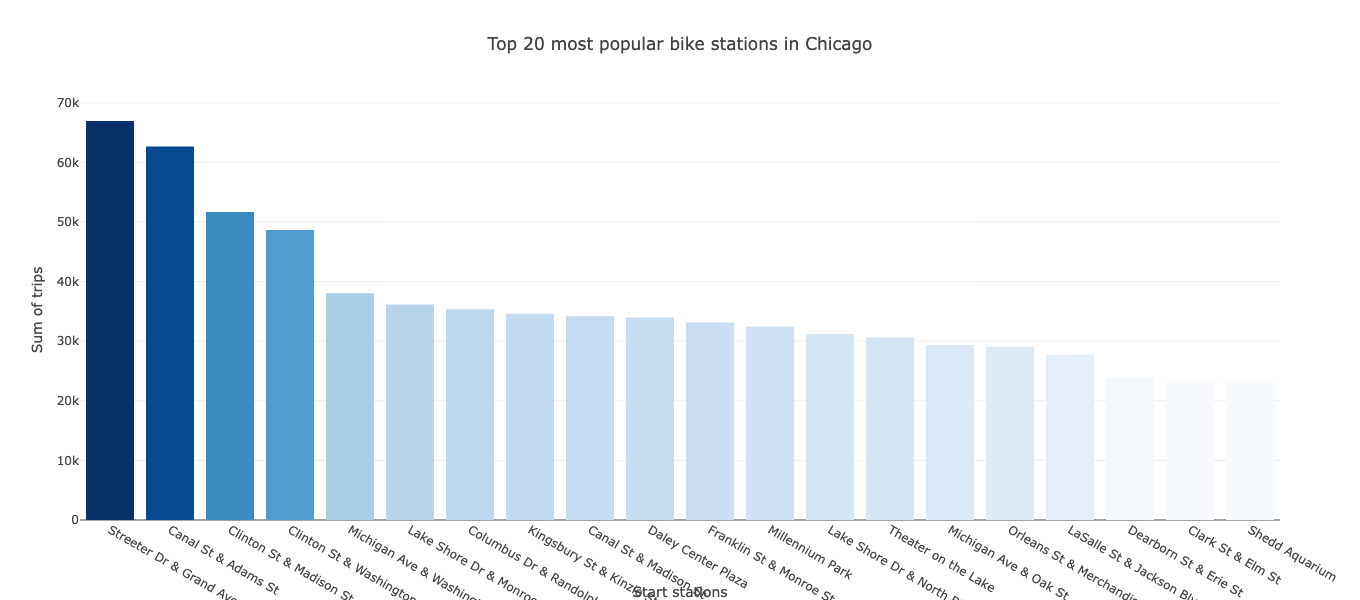

In [13]:
# Bar chart
# Update the Plotly chart layout with titles and custom dimensions

fig.update_layout(
    title = 'Top 20 most popular bike stations in Chicago',
    xaxis_title = 'Start stations',
    yaxis_title ='Sum of trips',
    width = 900, height = 600)

#### _The next chart's output has been deleted because it inflates the notebook's size a lot_ 

In [14]:
# Line chart
# Because This Chart Slows Down, i will comment it out

# CHART START
# fig = make_subplots(specs = [[{"secondary_y": True}]])

# fig.add_trace(
# go.Scatter(x = df['date'], y = df['bike_rides_daily'], name = 'Daily bike rides'),
# secondary_y = False
# )

# fig.add_trace(
# go.Scatter(x=df['date'], y = df['avgTemp'], name = 'Daily temperature'),
# secondary_y=True
# )
# CHART END

In [15]:
# Run Python’s garbage collector to free up unused memory

import gc # this is a garbage collector
gc.collect()

270

In [16]:
# Save the top 20 stations as a csv file 

top20.to_csv('top20.csv')

In [17]:
# List all column names in the dataframe

df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'start_station_name', 'to_station_id',
       'end_station_name', 'usertype', 'gender', 'birthyear', 'date',
       'avgTemp', '_merge', 'birth_year', 'birth_year_2', 'age', 'value',
       'bike_rides_daily', 'merge_flag', 'month', 'season'],
      dtype='object')

### Reduce the row and column count

In [18]:
df.head(5)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,start_station_name,to_station_id,end_station_name,usertype,...,avgTemp,_merge,birth_year,birth_year_2,age,value,bike_rides_daily,merge_flag,month,season
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,...,-18.9,both,1988,1988-01-01,37,1,376,both,1,winter
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,...,-18.9,both,1984,1984-01-01,41,1,376,both,1,winter
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,2904.0,98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,...,-18.9,both,1989,1989-01-01,36,1,376,both,1,winter
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,...,-18.9,both,1983,1983-01-01,42,1,376,both,1,winter
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,...,-18.9,both,1989,1989-01-01,36,1,376,both,1,winter


In [19]:
# Create a copy with fewer columns
# Drop unnecessary columns to create a simplified dataframe for further analysis

df_1 = df.drop(columns = {'trip_id', 'start_time', 'end_time', 'bikeid',
       'tripduration', 'from_station_id', 'to_station_id', 'usertype', 'gender', 'birthyear',
                          'birth_year', 'birth_year_2', 'age','merge_flag', 'month'})

##### Create a random split

In [20]:
# Set a random seed and create a boolean mask that selects about 92% of the rows
# Set a random seed and create a boolean mask with a 92% True probability

np.random.seed(32)
red = np.random.rand(len(df_1)) <= 0.92

In [21]:
# Create a smaller dataframe by selecting rows not included in the boolean mask

small = df_1[~red]

In [22]:
# Display the number of rows and columns in the small dataframe

small.shape

(287405, 8)

In [23]:
# Export the reduced dataframe to a CSV file without including the index

small.to_csv('reduced_data_to_plot_7.csv',index = False)

In [24]:
# Export the simplified dataframe to a CSV file

df_1.to_csv('reduced_data_to_plot.csv')